## Analiza matematica
### Extreme in 2D. Extreme libere
<div align="right"> Stanescu Daria Maria</div>
<br><br><font size="3"> Fie $f=f(x,y)$ si $g=g(x,y)$ doua functii de 2 variabile, $f,g:\mathbb{R}²→\mathbb{R}$ , definite, derivabile si continue pe intreg domeniul de definitie,
$ƒ(x,y)=x^3-4y^2+2xy-6x$ si 
$g(x,y)=sin(x)+cos(y)$</font>

<IPython.core.display.Javascript object>


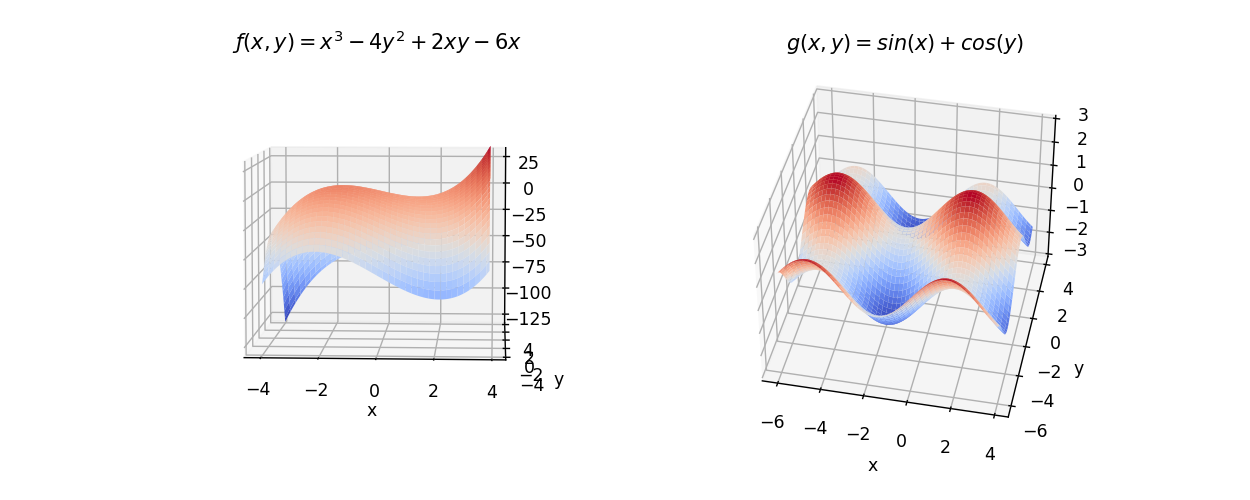

In [20]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

#GRAFIC f(X)
fig = plt.figure('GRAFICE',figsize=(10,4))
ax = fig.add_subplot(121, projection='3d')

# axe + functie
x = np.arange(-4,4,0.1)
y = np.arange(-4,4,0.1)
x, y = np.meshgrid(x, y)
functie = x**3-4*y**2+2*x*y-6*x

# plot suprafata
surf = ax.plot_surface(x, y , functie ,cmap=cm.coolwarm, antialiased=True)
ax.set_zlim3d(-130,30)
ax.set(title=r'$ƒ(x,y)=x^3-4y^2+2xy-6x$')
plt.xlabel("x")
plt.ylabel("y")

#GRAFIC g(X)
ax = fig.add_subplot(122,projection='3d')

# axe + functie
x = np.arange(-6,4,0.1)
y = np.arange(-6,4,0.1)
x, y = np.meshgrid(x, y)
functie = np.sin(x)+np.cos(y)

# plot suprafata
surf = ax.plot_surface(x, y , functie , cmap=cm.coolwarm, antialiased=True)
ax.set_zlim(-3, 3)
ax.set(title=r'$g(x,y)=sin(x)+cos(y)$')
plt.xlabel("x")
plt.ylabel("y")

plt.show()


<font size="3">Ne propunem sa studiem punctele critice pentru a afla punctele de extrem (maxime si minime) ale functiei: </font>$ƒ(x,y)=x^3-4y^2+2xy-6x$
<br>
### Pasul I:
<font size="3">Aflam punctele critice prin rezolvarea sistemului:
$\begin{equation}
  \begin{cases}
    \frac{\partial f}{\partial x}=f_{x}=0 \\
   \frac{\partial f}{\partial y}=f_{y}=0
  \end{cases}
\end{equation}$
, unde $f_x$ si $f_y$ sunt derivatele partiale de ordin intai ale functiei $f$</font>



In [12]:
import sympy as s
import numpy as np
x,y=s.symbols('x,y',real=True)
#functia

f=x**3-4*y**2+2*x*y-6*x

#alte exemple de functii
#f=x**3+y**3-6*x*y
#f=4*x*y-x**4-y**4

#derivate partiale
fx=s.diff(f,x)
fy=s.diff(f,y)
display(s.Eq(s.Symbol('f_x'),fx))
display(s.Eq(s.Symbol('f_y'),fy))

#rezolvare sistem fx=0, fy=0
a=s.solve([fx,fy],(x,y,f))
n=len(a)
print("Punctele critice sunt:\n")
for i in range(n):
    print("A%d" % (i+1),end=' ')
    print(a[i])

Eq(f_x, 3*x**2 + 2*y - 6)

Eq(f_y, 2*x - 8*y)

Punctele critice sunt:

A1 (-3/2, -3/8, 99/16)
A2 (4/3, 1/3, -140/27)


### Pasul 2:
<font size="3">Construim matricea Hessiana sub forma generala pentru fiecare punct critic</font> $A_i$ : $H_f(A_i)=
\begin{pmatrix}
f_{xx}(A_i) & f_{xy}(A_i)\\
f_{yx}(A_i) & f_{yy}(A_i)
\end{pmatrix}$<font size="3">, unde $f_{xx}$, $f_{yy}$, $f_{xy}$ si $f_{yx}$ sunt derivatele partiale de ordin doi ale functiei $f$</font>

In [13]:
import sympy as s
import numpy as np
import pprint as pp

#derivate partiale 2 
fxx=s.diff(fx,x)
fyy=s.diff(fy,y)
fxy=s.diff(fx,y)
fyx=s.diff(fy,x)

display(s.Eq(s.Symbol('f_{xx}'),fxx))
display(s.Eq(s.Symbol('f_{yy}'),fyy))
display(s.Eq(s.Symbol('f_{xy}'),fxy))
display(s.Eq(s.Symbol('f_{yx}'),fyx))

#matricea hessiana
Hf=s.Matrix([(fxx,fxy),(fyx,fyy)])
print("Hessiana este:\n")
s.pprint(Hf)

Eq(f_{xx}, 6*x)

Eq(f_{yy}, -8)

Eq(f_{xy}, 2)

Eq(f_{yx}, 2)

Hessiana este:

⎡6⋅x  2 ⎤
⎢       ⎥
⎣ 2   -8⎦


### Pasul 3:
<font size="3">Pentru fiecare punct critic $A_i$ calculam valorile proprii ale matricei Hessiene cu ajutorul polinomului caracteristic</font> $P_M(\lambda)=det(M-\lambda I_2)$ , unde $M=H_f(A_i)$.
<ul>
  <li>Daca $\lambda_1>0$ si $\lambda_2>0$, atunci $A_i$ este minim local</li>
  <li>Daca $\lambda_1<0$ si $\lambda_2<0$, atunci $A_i$ este maxim local</li>
  <li>Daca $\lambda_1\cdot\lambda_2<0$, atunci $A_i$ este punct sa </li>
  <li>Daca $\lambda_1\cdot\lambda_2=0$, nu putem decide </li>  
</ul>

In [14]:
import sympy as s
import numpy as np
for i in range(n):
    #substituire x si y in derivatele partiale 2
    Fxx=fxx.subs({x:a[i][0],y:a[i][1]})
    Fyy=fyy.subs({x:a[i][0],y:a[i][1]})
    Fxy=fxy.subs({x:a[i][0],y:a[i][1]})
    Fyx=fyx.subs({x:a[i][0],y:a[i][1]})

    # I varianta (cu valori proprii)  
    c=s.symbols('𝜆')
    
    #calcul polinom caracteristic
    Mat=s.Matrix([(Fxx-c,Fxy),(Fyx,Fyy-c)])
    polinom_caracteristic=Mat.det()
    print("_________________")
    display(polinom_caracteristic)
    
    
    #calcul valori proprii
    sol=s.solve(polinom_caracteristic,c)
    display(s.Eq(s.Symbol('𝜆₁'),sol[0]))
    display(s.Eq(s.Symbol('𝜆₂'),sol[1]))
    
    #cazuri
    print("A%d" % (i+1),end=' ')
    if sol[0]*sol[1]<0: print(a[i],"punct sa")
    elif sol[0]>0 and sol[1]>0: print(a[i],"minim local")
    elif sol[0]<0 and sol[1]<0: print(a[i],"maxim local")
    else: print("Nu se poate stabili pentru acest punct ")

_________________


𝜆**2 + 17*𝜆 + 68

Eq(𝜆₁, -17/2 - sqrt(17)/2)

Eq(𝜆₂, -17/2 + sqrt(17)/2)

A1 (-3/2, -3/8, 99/16) maxim local
_________________


𝜆**2 - 68

Eq(𝜆₁, -2*sqrt(17))

Eq(𝜆₂, 2*sqrt(17))

A2 (4/3, 1/3, -140/27) punct sa


### Pasul 3 (varianta alternativa):
<font size="3">Pentru fiecare punct critic $A_i$ calculam matricea Hessiana si decidem astfel:
<ul>
  <li>Daca $det(H_f(A_i))>0$ si $f_{xx}(A_i)>0$, atunci $A_i$ este minim local</li>
  <li>Daca $det(H_f(A_i))>0$ si $f_{xx}(A_i)<0$, atunci $A_i$ este maxim local</li>
  <li>Daca $det(H_f(A_i))<0$, atunci $A_i$ este punct sa </li>
  <li>Altfel, nu putem decide </li>  
</ul>

In [15]:
import sympy as s
import numpy as np
for i in range(n):
    #substituire x si y in derivatele partiale
    Fxx=fxx.subs({x:a[i][0],y:a[i][1]})
    Fyy=fyy.subs({x:a[i][0],y:a[i][1]})
    Fxy=fxy.subs({x:a[i][0],y:a[i][1]})
    Fyx=fyx.subs({x:a[i][0],y:a[i][1]})

    #matricea hessiana evaluata in punctul critic Pi
    Hf=[(Fxx,Fxy),(Fyx,Fyy)]
    Hf=s.Matrix(Hf)
    print('\n')
    s.pprint(Hf)
    print('\n')
   
    
    # a II-a varianta (fara valori proprii)
    print("A%d" % (i+1),end=' ')
    if Hf.det()<0 : print(a[i],"Punct șa")
    elif Hf.det()>0 and Fxx>0 : print(a[i],"Minim local")
    elif Hf.det()>0 and Fxx<0 : print(a[i],"Maxim local")
    else: print("Nu se poate stabili pentru punctul A%d" % (i+1))



⎡-9  2 ⎤
⎢      ⎥
⎣2   -8⎦


A1 (-3/2, -3/8, 99/16) Maxim local


⎡8  2 ⎤
⎢     ⎥
⎣2  -8⎦


A2 (4/3, 1/3, -140/27) Punct șa


<IPython.core.display.Javascript object>


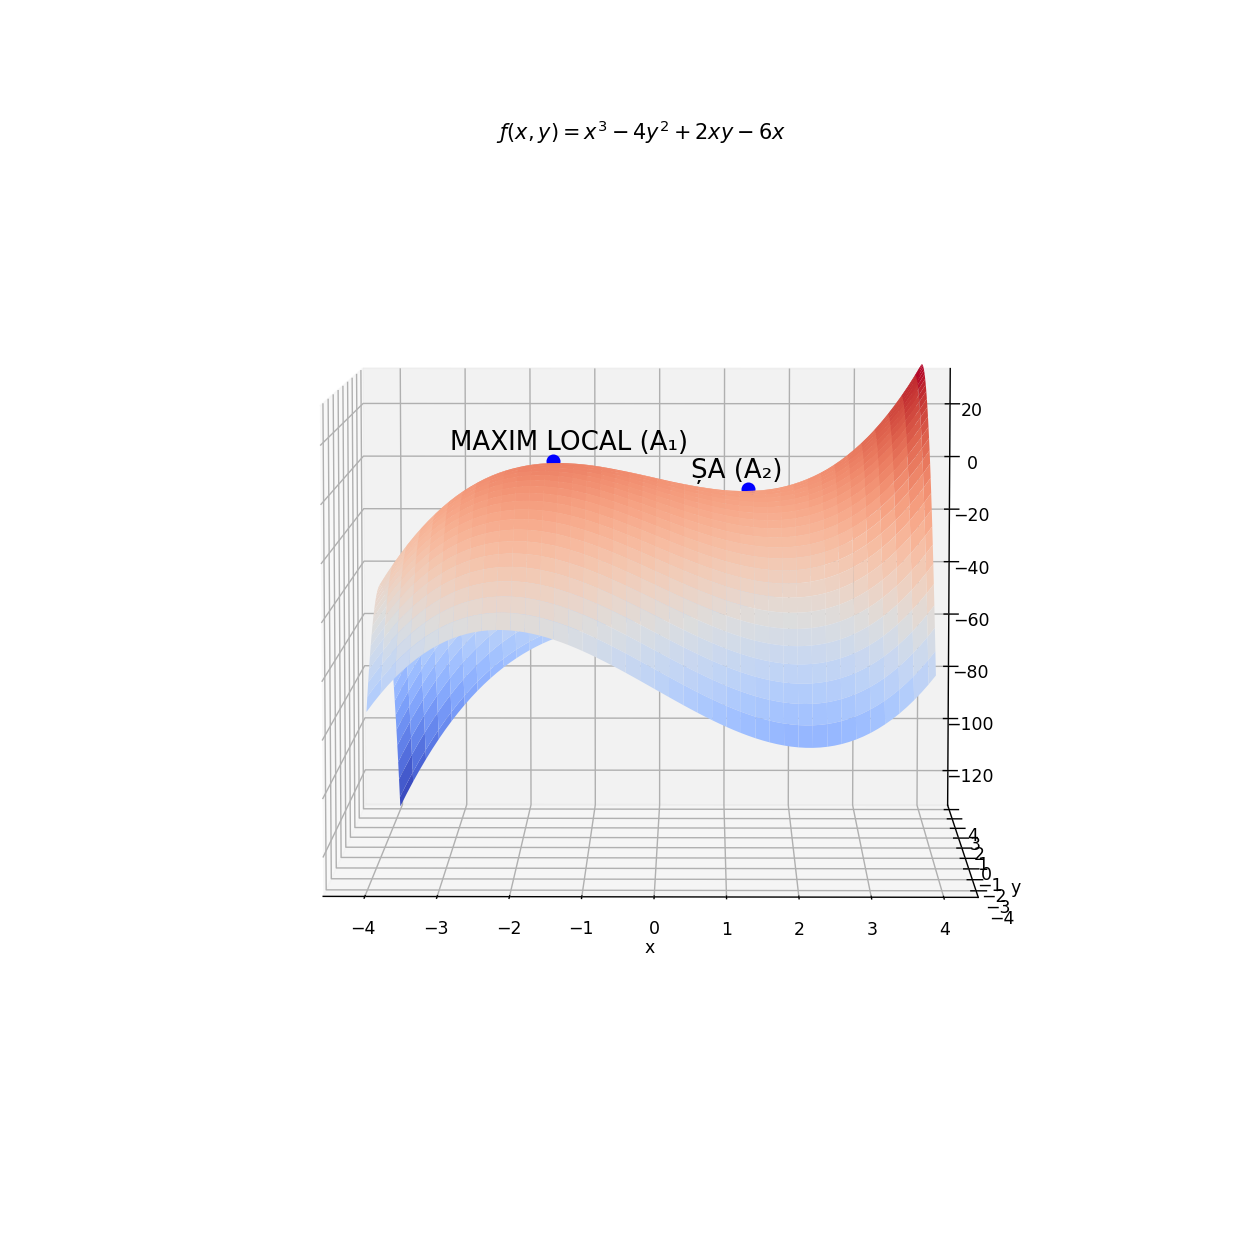

In [21]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

#GRAFIC f(X)
fig = plt.figure('GRAFIC CU PUNCTE CRITICE',figsize=(10,10))
ax = fig.gca(projection='3d')
# axe + functie
x = np.arange(-4,4,0.1)
y = np.arange(-4,4,0.1)
x, y = np.meshgrid(x, y)
functie = x**3-4*y**2+2*x*y-6*x

# plot suprafata
surf = ax.plot_surface(x, y , functie ,cmap=cm.coolwarm, antialiased=True)
ax.set_zlim3d(-130,30)
ax.set(title=r'$ƒ(x,y)=x^3-4y^2+2xy-6x$')
plt.xlabel("x")
plt.ylabel("y")

#puncte de extrem
ax.scatter(-3/2,-3/8, 99/16+1,marker='o',color='blue',s=50)
ax.text(-3,-3/8, 99/16+5,"MAXIM LOCAL (A₁)",size=15)
ax.scatter(4/3,1/3, -140/27+1,marker='o',color='blue',s=50)
ax.text(0.5,1/3, -140/27+5,"ȘA (A₂)",size=15)

plt.show()
